In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram, lfilter

# Amplitude Modulation (AM)

Amplitude Modulation (AM) is a method of modulating a message signal onto a carrier wave. The amplitude of the carrier wave is varied in proportion to that of the message signal. This technique is widely used in electronic communication, being one of the simplest methods of conveying information via a radio carrier wave.

## Mathematical Model

The general form of an AM signal can be expressed as follows:

$s_{AM}(t) = [A_c + m(t)] \cdot \cos(2\pi f_c t)$

where:
- $s_{AM}(t)$ is the amplitude-modulated signal,
- $A_c$ is the amplitude of the carrier wave,
- $m(t)$ is the message signal,
- $f_c$ is the carrier frequency.

The message signal $m(t)$ should be a low-frequency signal compared to the carrier frequency. The term $A_c + m(t)$ indicates that the carrier's amplitude is being varied by the message signal's instantaneous amplitude.

The modulation index $\mu$ is a parameter that measures the extent of modulation applied to the carrier and is defined as the ratio of the message signal amplitude to the carrier amplitude:

$\mu = \frac{A_m}{A_c}$

where $A_m$ is the peak amplitude of the message signal. The modulation index determines the overall amplitude changes in the modulated signal and affects the power distribution among the carrier and sidebands.

In [2]:
# Sample rate and time vector to define the discrete time axis
fs = 6.25E6  # Sample rate in Hz
t = np.arange(0, 1, 1/fs)  # Time vector for 1 second

# Carrier signal parameters
Ac = 1       # Amplitude of the carrier signal
fc = 530E3   # Carrier frequency in Hz

# Message signal parameters
Am = 0.5   # Amplitude of the message signal
fm = 1000     # Message frequency in Hz

# Generating the carrier and message signals
carrier = Ac * np.cos(2 * np.pi * fc * t)
message = Am * np.cos(2 * np.pi * fm * t)

# AM modulation
s_AM = (Ac + message) * carrier

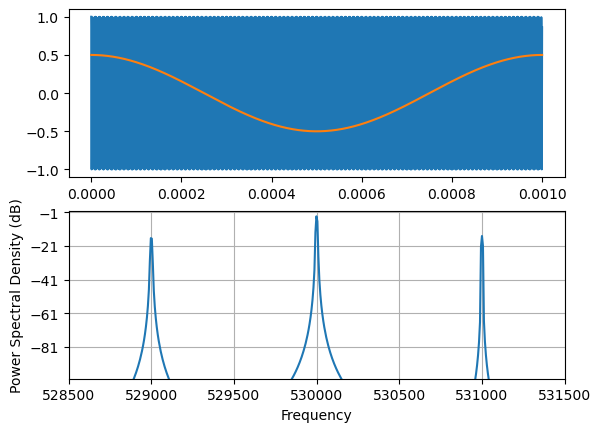

In [3]:
plt.figure()
plt.subplot(211)
plt.plot(t[0:6250], carrier[0:6250])
plt.plot(t[0:6250], message[0:6250])
plt.subplot(212)
plt.psd(s_AM, Fs=fs, NFFT=1048576, scale_by_freq=False)
plt.xlim(fc-1500, fc+1500)
plt.ylim(-100, 0)
plt.show()

Noise - set SNR

In [4]:
snr_dB = -10
# Calculate signal power and convert to dB 
s_AM_avg_watts = np.mean(s_AM ** 2)
s_AM_avg_db = 10 * np.log10(s_AM_avg_watts)

# Calculate noise according to SNR
noise_avg_db = s_AM_avg_db - snr_dB
noise_avg_watts = 10 ** (noise_avg_db / 10)

# Generate an sample of white noise
mean_noise = 0
noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(s_AM))

In [5]:
f, Pxx_noise = periodogram(noise, fs, window='hamming', nfft=t.shape[0], scaling='spectrum')
Pxx_noise_dBV = 10*np.log10(Pxx_noise)

In [6]:
ba = np.array([[1.00000000e-04, 2.82146977e-04, -5.30668743e-04,
                -1.52541578e-02, -1.32441256e-02,  1.40169236e-01,
                3.88575893e-01, 3.88575893e-01, 1.40169236e-01,
                -1.32441256e-02, -1.52541578e-02, -5.30668743e-04,
                2.82146977e-04, 1.00000000e-04],
               [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

noise_filtered = lfilter(ba[0], ba[1], noise)

In [7]:
s_AM_noised = noise_filtered+s_AM

In [8]:
f, Pxx_noise_filtered = periodogram(s_AM_noised,
                                    fs, window='hamming',
                                    nfft=t.shape[0],
                                    scaling='spectrum')
Pxx_noise_filtered_dBV = 10*np.log10(Pxx_noise_filtered)

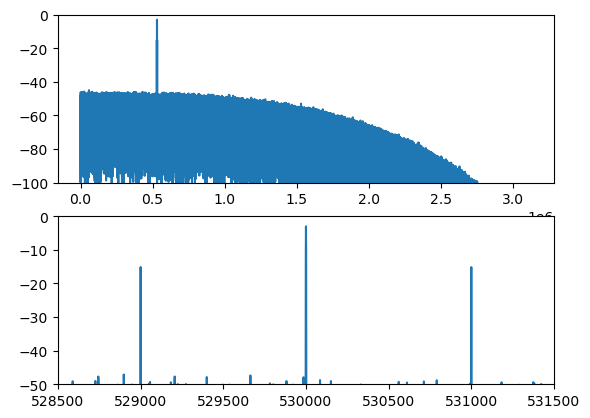

In [9]:
plt.figure()
plt.subplot(211)
plt.plot(f, Pxx_noise_filtered_dBV)
plt.ylim(-100, 0)
plt.subplot(212)
plt.plot(f, Pxx_noise_filtered_dBV)
plt.xlim(fc-1500, fc+1500)
plt.ylim(-50, 0)
plt.show()

In [10]:
np.save(f'signal_{snr_dB}.npy', s_AM_noised)